In [161]:
#Importing Packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import audioflux as af
from scipy.io import wavfile
import sounddevice as sd
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
import cv2
from sklearn import metrics
from sklearn.utils import shuffle
import IPython.display as ipd
from IPython.display import Audio
import librosa.display
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow.keras.layers as L
import datetime
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [162]:
#Loading Datasets
savee = os.listdir('savee_dataset')
crema_d = os.listdir('crema_d_dataset')
ravdess = os.listdir('ravdess_dataset')
tess = os.listdir('TESS')

In [163]:
#Classifying Savee Dataset
emotion = []
for wav in savee:
    w = wav.split('_')[1]
    if w[0:2] == 'sa':
        emotion.append('male_sad')
    elif w[0] == 'n':
        emotion.append('male_neutral')
    elif w[0:2] == 'su':
        emotion.append('male_surprised')
    elif w[0] == 'f':
        emotion.append('male_fear')
    elif w[0] == 'd':
        emotion.append('male_disgust')
    elif w[0] == 'h':
        emotion.append('male_happy')
    elif w[0] =='a':
        emotion.append('male_anger')
print(len(emotion))

480


In [164]:
#Creating Dataframe
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(savee, columns=['Path'])
savee_df = pd.concat([emotion_df, path_df], axis = 1)
savee_df['folder'] = 'savee_dataset/'
savee_df.head(10)

,Emotions,Path,folder
0,male_sad,JK_sa01.wav,savee_dataset/
1,male_sad,JK_sa15.wav,savee_dataset/
2,male_neutral,DC_n13.wav,savee_dataset/
3,male_surprised,DC_su09.wav,savee_dataset/
4,male_neutral,DC_n07.wav,savee_dataset/
5,male_neutral,JK_n20.wav,savee_dataset/
6,male_neutral,JK_n08.wav,savee_dataset/
7,male_sad,JE_sa08.wav,savee_dataset/
8,male_fear,JK_f15.wav,savee_dataset/
9,male_fear,JK_f01.wav,savee_dataset/


In [165]:
tess.remove('.DS_Store')

In [166]:
#Classifying Tess dataset
emotion=[]
tess_wavs=[]
for folder in tess:
    fname=os.listdir('TESS/' + folder)
    for files in fname:
        tess_wavs.append(f'{folder}/{files}')
        if folder == 'OAF_Sad' or folder == 'YAF_sad':
            emotion.append('female_sad')
        elif folder == 'OAF_neutral' or folder == 'YAF_neutral':
            emotion.append('female_neutral')
        elif folder == 'OAF_Pleasant_surprise' or folder == 'YAF_pleasant_surprised':
            emotion.append('female_surprised')
        elif folder == 'OAF_Fear' or folder == 'YAF_fear':
            emotion.append('female_fear')
        elif folder == 'OAF_disgust' or folder == 'YAF_disgust':
            emotion.append('female_disgust')
        elif folder == 'OAF_happy' or folder == 'YAF_happy':
            emotion.append('female_happy')
        elif folder =='OAF_angry' or folder == 'YAF_angry':
            emotion.append('female_anger')

In [167]:
#Creating Dataframe for tess
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(tess_wavs, columns=['Path'])
tess_df = pd.concat([emotion_df, path_df], axis = 1)
tess_df['folder'] = 'TESS/'

In [168]:
tess_df['Emotions'].value_counts()

Emotions
female_disgust      400
female_surprised    400
female_happy        400
female_sad          400
female_neutral      400
female_fear         400
female_anger        400
Name: count, dtype: int64

In [169]:
#Classifying crema_d dataset
emotion = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,
          1046,1047,1049,1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,
          1084,1089,1091]
for wav in crema_d:
    w = wav.split('_')
    if int(w[0]) in female:
        if w[2] == 'SAD':
            emotion.append('female_sad')
        elif w[2] == 'NEU':
            emotion.append('female_neutral')
        elif w[2] == 'SUR':
            emotion.append('female_surprised')
        elif w[2] == 'FEA':
            emotion.append('female_fear')
        elif w[2] == 'DIS':
            emotion.append('female_disgust')
        elif w[2] == 'HAP':
            emotion.append('female_happy')
        elif w[2] =='ANG':
            emotion.append('female_anger')
    else:
        if w[2] == 'SAD':
            emotion.append('male_sad')
        elif w[2] == 'NEU':
            emotion.append('male_neutral')
        elif w[2] == 'SUR':
            emotion.append('male_surprised')
        elif w[2] == 'FEA':
            emotion.append('male_fear')
        elif w[2] == 'DIS':
            emotion.append('male_disgust')
        elif w[2] == 'HAP':
            emotion.append('male_happy')
        elif w[2] =='ANG':
            emotion.append('male_anger')
print(len(emotion))

7442


In [170]:
#creating dataset
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(crema_d, columns=['Path'])
crema_d_df = pd.concat([emotion_df, path_df], axis = 1)
crema_d_df['folder'] = 'crema_d_dataset/'

In [171]:
#Selecting 1500 male voices to balance dataset
crema_d_df = shuffle(crema_d_df).reset_index(drop=True)

male_crema= crema_d_df[crema_d_df['Emotions'].str.startswith('male')]
male_crema=male_crema.reset_index(drop=True)
male_crema = male_crema.loc[0:1499]
print(male_crema)

          Emotions                 Path            folder
0       male_anger  1050_IOM_ANG_XX.wav  crema_d_dataset/
1       male_anger  1034_IEO_ANG_MD.wav  crema_d_dataset/
2     male_disgust  1057_ITS_DIS_XX.wav  crema_d_dataset/
3     male_disgust  1087_IEO_DIS_HI.wav  crema_d_dataset/
4         male_sad  1011_WSI_SAD_XX.wav  crema_d_dataset/
...            ...                  ...               ...
1495  male_disgust  1081_IOM_DIS_XX.wav  crema_d_dataset/
1496    male_anger  1001_IOM_ANG_XX.wav  crema_d_dataset/
1497    male_anger  1065_ITH_ANG_XX.wav  crema_d_dataset/
1498     male_fear  1035_ITS_FEA_XX.wav  crema_d_dataset/
1499    male_anger  1050_IWL_ANG_XX.wav  crema_d_dataset/

[1500 rows x 3 columns]


In [172]:
ravdess.remove('.DS_Store')

In [173]:
#Classifying ravdess dataset
emotion = []
ravdess_wavs = []
for actor in ravdess:
    wavs = os.listdir(f'ravdess_dataset/{actor}')
    for wav in wavs:
        ravdess_wavs.append(f'{actor}/{wav}')
        if int(wav[18:20])%2==0:
            if wav[7:8] == '4':
                emotion.append('female_sad')
            elif wav[7:8] == '1':
                emotion.append('female_neutral')
            elif wav[7:8] == '8':
                emotion.append('female_surprised')
            elif wav[7:8] == '6':
                emotion.append('female_fear')
            elif wav[7:8] == '7':
                emotion.append('female_disgust')
            elif wav[7:8] == '3':
                emotion.append('female_happy')
            elif wav[7:8] =='5':
                emotion.append('female_anger')
            elif wav[7:8] =='2':
                emotion.append('female_neutral')
        else:
            if wav[7:8] == '4':
                emotion.append('male_sad')
            elif wav[7:8] == '1':
                emotion.append('male_neutral')
            elif wav[7:8] == '8':
                emotion.append('male_surprised')
            elif wav[7:8] == '6':
                emotion.append('male_fear')
            elif wav[7:8] == '7':
                emotion.append('male_disgust')
            elif wav[7:8] == '3':
                emotion.append('male_happy')
            elif wav[7:8] =='5':
                emotion.append('male_anger')
            elif wav[7:8] =='2':
                emotion.append('male_neutral')
        
print(len(emotion))

1440


In [174]:
#Creating ravdess dataframe
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(ravdess_wavs, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis = 1)
ravdess_df['folder'] = 'ravdess_dataset/'

In [175]:
#Combining Datasets
data = pd.concat([savee_df, tess_df, ravdess_df, male_crema], axis=0)
data = data.reset_index(drop=True)

In [176]:
data['Emotions'].value_counts()

Emotions
female_neutral      544
female_disgust      496
female_surprised    496
female_happy        496
female_sad          496
female_fear         496
female_anger        496
male_neutral        487
male_fear           416
male_happy          413
male_anger          413
male_sad            410
male_disgust        405
male_surprised      156
Name: count, dtype: int64

In [177]:
#Removing disgust and surprised data
data = data[data['Emotions'] != 'female_disgust']
data = data[data['Emotions'] != 'male_disgust']
data = data[data['Emotions'] != 'female_surprised']
data = data[data['Emotions'] != 'male_surprised']
data = data.reset_index(drop=True)

In [178]:
#Shuffling Data
data = shuffle(data).reset_index(drop=True)

In [179]:
#Functions to change noise, pitch and stretch
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def pitch(data):
    return librosa.effects.pitch_shift(data, sr=22050, n_steps=3)

def stretch(data):
    stretch= librosa.effects.time_stretch(data, rate=1.2)
    pad = len(data)-len(stretch)
    stretch = np.pad(stretch, (0,pad), mode='constant')
    return stretch


In [180]:
#Original Audio
data1,sr = librosa.load('ravdess_dataset/Actor_10/03-01-02-01-01-01-10.wav')

ipd.Audio(data1,rate=sr)

In [181]:
#Mimic child
pitched=librosa.effects.pitch_shift(data1, sr=22050, n_steps=3)
ipd.Audio(pitched,rate=sr)

In [182]:
#Audio Compressed
stretch= librosa.effects.time_stretch(data1, rate=1.5)
stretch = np.pad(stretch, (len(data1) - len(stretch)), mode='constant')
ipd.Audio(stretch ,rate=sr)

In [183]:
#Different Features
def zcr(data):
    zcr=librosa.feature.zero_crossing_rate(data)
    return np.squeeze(zcr)

def rmse(data):
    rmse=librosa.feature.rms(y=data)
    return np.squeeze(rmse)

def mfcc(data, flatten:bool=True):
    mfcc = librosa.feature.mfcc(y=data)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def mel(data, flatten:bool=True):
    mel = librosa.feature.melspectrogram(y=data)
    return np.squeeze(mel.T) if not flatten else np.ravel(mel.T)

def extract_features(data):
    result=np.array([])
    result=np.hstack((result, zcr(data), rmse(data), mfcc(data)))
    return result

In [184]:
#Extracting different features for each augmentation
def get_features(path):
    data,sr=librosa.load(path)    
    aud = extract_features(data)
    audio = np.array(aud)

    noise_audio=noise(data)
    naud = extract_features(noise_audio)
    audio=np.vstack((audio,naud))

    pitched_audio=pitch(data)
    paud = extract_features(pitched_audio)
    audio=np.vstack((audio,paud))

    pna=noise(pitched_audio)
    pnaud=extract_features(pna)
    audio=np.vstack((audio, pnaud))

    stretch= librosa.effects.time_stretch(data, rate=1.5)
    pad = len(data)-len(stretch)
    stretch = np.pad(stretch, (0,pad), mode='constant')
    staud = extract_features(stretch)
    audio=np.vstack((audio, staud))
    '''stretch = stretch(data)
    staud = extract_features(stretch)
    audio=np.vstack((audio, staud))'''

    n_stretch= noise(stretch)
    n_staud = extract_features(n_stretch)
    audio=np.vstack((audio, n_staud))
        
    return audio

In [185]:
data

,Emotions,Path,folder
0,female_anger,OAF_angry/OAF_jar_angry.wav,TESS/
1,female_anger,YAF_angry/YAF_hire_angry.wav,TESS/
2,female_neutral,YAF_neutral/YAF_kill_neutral.wav,TESS/
3,female_sad,YAF_sad/YAF_kick_sad.wav,TESS/
4,female_sad,YAF_sad/YAF_chain_sad.wav,TESS/
...,...,...,...
4662,male_anger,Actor_05/03-01-05-02-01-02-05.wav,ravdess_dataset/
4663,male_happy,1032_TSI_HAP_XX.wav,crema_d_dataset/
4664,female_anger,OAF_angry/OAF_good_angry.wav,TESS/
4665,female_sad,Actor_10/03-01-04-01-02-01-10.wav,ravdess_dataset/


In [186]:
#Creating features
X=[]
Y=[]
for path,folder,emotion in (zip(data.Path,data.folder,data.Emotions)):
    path = folder+path
    features=get_features(path)
    for feature in features:
        X.append(feature)
        Y.append(emotion)

In [131]:
#putting into dataframe
Emotions = pd.DataFrame(X)
Emotions['Emotions']=Y
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,6767,6768,6769,6770,6771,6772,6773,6774,6775,Emotions
0,0.000000,0.000000,0.041504,0.157227,0.255371,0.326660,0.383301,0.324707,0.242676,0.191895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_anger
1,0.240723,0.364746,0.473633,0.483887,0.477539,0.437012,0.437500,0.373535,0.279785,0.220215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_anger
2,0.000488,0.005371,0.088867,0.189453,0.236816,0.328125,0.309570,0.228027,0.213379,0.159180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_anger
3,0.089355,0.139160,0.238281,0.312500,0.299316,0.342773,0.310547,0.228027,0.212402,0.165039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_anger
4,0.000000,0.045898,0.165527,0.242676,0.282227,0.255371,0.162109,0.109863,0.082031,0.077148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_anger


In [132]:
#Missing values
Emotions.isna().sum()

0               0
1               0
2               0
3               0
4               0
            ...  
6772        13470
6773        13470
6774        13470
6775        13470
Emotions        0
Length: 6777, dtype: int64

In [133]:
#Filling missing values with zero
Emotions= Emotions.fillna(0)

In [134]:
#Seperating target value
X=Emotions.iloc[:,:-1].values
Y=Emotions['Emotions'].values

In [135]:
#Splitting dataset into train, val and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [136]:
#Encoding target variable
label_encoder = LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_val=label_encoder.transform(y_val)
y_test=label_encoder.transform(y_test)
print(y_train)

[ 9  9  9 ...  9 11  8]


In [137]:
#Creating correct dimensions
X_train =np.expand_dims(X_train, axis=2)
X_val= np.expand_dims(X_val, axis=2)
X_test= np.expand_dims(X_test, axis=2)

In [141]:
#CNN Model
model = tf.keras.Sequential([
    L.Conv1D(32,kernel_size=5,strides=1,padding='same',activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=2,strides=2,padding='same'),
    Dropout(0.2),  
    
    L.Conv1D(64,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=2,strides=2,padding='same'),
    Dropout(0.2),  
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=2,strides=2,padding='same'),
    Dropout(0.2), 

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=4,strides=4,padding='same'),
    Dropout(0.2), 

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=4,strides=4,padding='same'),
    Dropout(0.2), 

    L.Flatten(),
    L.Dense(64,activation='relu'),
    L.BatchNormalization(),
    L.Dense(12,activation='softmax')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 6776, 32)       │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6776, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 3388, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3388, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 3388, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 3388, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 1694, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1694, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 1694, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1694, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 847, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 847, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 847, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 847, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 212, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 212, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 212, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 212, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 53, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 53, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6784)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       434,240 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 665,804 (2.54 MB)

 Trainable params: 664,460 (2.53 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [142]:
#Training model
%load_ext tensorboard

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(X_train,y_train,
                   epochs=250,
                   validation_data=(X_val,y_val),
                   callbacks=cp)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/250
253/253 ━━━━━━━━━━━━━━━━━━━━ 84s 326ms/step - accuracy: 0.2836 - loss: 2.0922 - val_accuracy: 0.3135 - val_loss: 1.7677
Epoch 2/250
253/253 ━━━━━━━━━━━━━━━━━━━━ 84s 330ms/step - accuracy: 0.4788 - loss: 1.4426 - val_accuracy: 0.5139 - val_loss: 1.2724
Epoch 3/250
253/253 ━━━━━━━━━━━━━━━━━━━━ 95s 376ms/step - accuracy: 0.5544 - loss: 1.2251 - val_accuracy: 0.5443 - val_loss: 1.2923
Epoch 4/250
253/253 ━━━━━━━━━━━━━━━━━━━━ 98s 386ms/step - accuracy: 0.6122 - loss: 1.0588 - val_accuracy: 0.5985 - val_loss: 1.1325
Epoch 5/250
253/253 ━━━━━━━━━━━━━━━━━━━━ 97s 385ms/step - accuracy: 0.6651 - loss: 0.9085 - val_accuracy: 0.6015 - val_loss: 1.1771
Epoch 6/250
253/253 ━━━━━━━━━━━━━━━━━━━━ 129s 511ms/step - accuracy: 0.7098 - loss: 0.8083 - val_accuracy: 0.6623 - val_loss: 0.9701
Epoch 7/250
253/253 ━━━━━━━━━━━━━━━━━━━━ 155s 611ms/step - accuracy: 0.7183 - loss: 0.7615 - val_accuracy: 0.7391 - v

KeyboardInterrupt: 

In [160]:
#Evaluating model to previous models
%tensorboard --logdir logs/fit

In [143]:
#Evaluating model on test data
model.evaluate(X_test,y_test)

85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.8890 - loss: 0.5350


[0.5465046167373657, 0.8876112699508667]

In [117]:
#Predictions
predicted_emotion = model.predict(X_test)

175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step


In [685]:
#Making predictions Readable
predicted_classes = np.argmax(predicted_emotion, axis=1)
predicted_classes[0:20]

array([4, 8, 1, 2, 1, 4, 6, 1, 4, 2, 7, 0, 8, 3, 2, 0, 1, 2, 1, 8])

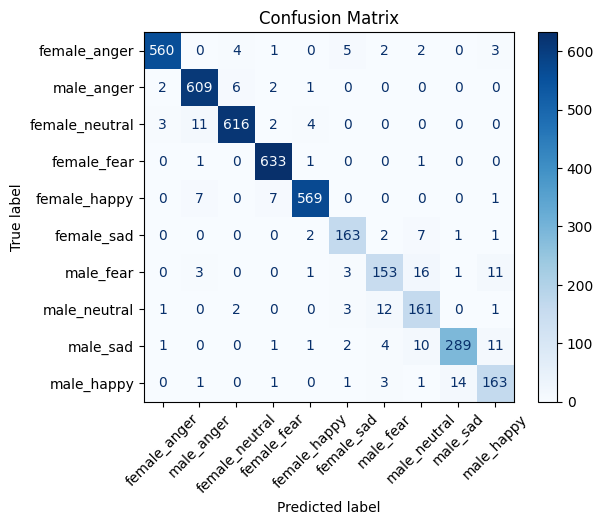

In [686]:
#Confusion matrix
unique_labels = data['Emotions'].unique()
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [687]:
#Saving model

model_95='95_accuracy_model.pkl'

with open(model_95, 'wb') as file:  
    pickle.dump(model, file)